In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('travelhack6.csv')
df.head()

,Пол,День рождения,Возраст клиента,Заявка №,Дата бронирования,Дата начала тура,Год,Ночей,Вид тура,Тип заявки,...,Младенцы,Звездность,Состав группы (Заявка) (Заявка),Сумма в $,Наименование тура,ИД клиента,Глубина продаж,Тип питания,Город Отеля,Город отправления
0,мужской,2018-08-28 00:00:00,2.0,4803671,2021-02-07 20:44:00,2021-05-04 00:00:00,2021,12,Пляжный отдых,Пакет,...,0,4*,Семья,1718.64,Turkey Antalya LED,4197428,85.136111,All Inclusive,NaN,Санкт-Петербург
1,мужской,1991-04-25 00:00:00,29.0,4803671,2021-02-07 20:44:00,2021-05-04 00:00:00,2021,12,Пляжный отдых,Пакет,...,0,4*,Семья,1718.64,Turkey Antalya LED,4197429,85.136111,All Inclusive,NaN,Санкт-Петербург
2,мужской,1980-11-05 00:00:00,40.0,4803915,2021-02-08 09:03:00,2021-03-04 00:00:00,2021,6,Пляжный отдых,Пакет,...,0,5*,Семья,948.45,Turkey Antalya MOW,4197517,23.622917,AIP,Боазкент,Москва
3,мужской,2013-02-27 00:00:00,8.0,4806034,2021-02-08 19:46:00,2021-10-09 00:00:00,2021,11,Пляжный отдых,Пакет,...,0,5*,Семья,2128.15,Turkey Antalya MOW,4197718,242.176389,UAI,Текирова,Москва
4,мужской,1968-10-06 00:00:00,52.0,4806034,2021-02-08 19:46:00,2021-10-09 00:00:00,2021,11,Пляжный отдых,Пакет,...,0,5*,Семья,2128.15,Turkey Antalya MOW,4197719,242.176389,UAI,Текирова,Москва


In [156]:
df['Тип заявки'].value_counts()

Пакет                             185987
Индивидуальный тур                 15342
Premium                             4317
Пакетные туры Mouzenidis            1956
Билеты чартерные                     747
Пакетные туры Anex                   317
Круиз                                287
VIP тур                              180
Инфотур                              111
Билеты регулярные                    101
Дополнительные услуги отдельно        82
SL TOUR                               75
Наземное обслуживание                 34
Hotelbeds                             32
Туры Выходного Дня                    22
Чартер + GDS                          18
Инфотур Outsorce                       1
Name: Тип заявки, dtype: int64

In [3]:
l = df.columns.tolist()
l.insert(0, l.pop(20))
df = df[l]
df.columns

Index(['ИД клиента', 'Пол', 'День рождения', 'Возраст клиента', 'Заявка № ',
       'Дата бронирования', 'Дата начала тура', 'Год', 'Ночей', 'Вид тура',
       'Тип заявки', 'Страна тура', 'Регион отеля', 'Туристов',
       'Туристы, взрослые', 'Туристы, дети', 'Младенцы', 'Звездность',
       'Состав группы (Заявка) (Заявка)', 'Сумма в $', 'Наименование тура',
       'Глубина продаж', 'Тип питания', 'Город Отеля', 'Город отправления'],
      dtype='object')

In [5]:
df.iloc[1]

ИД клиента                                     4197429
Пол                                            мужской
День рождения                      1991-04-25 00:00:00
Возраст клиента                                   29.0
Заявка №                                       4803671
Дата бронирования                  2021-02-07 20:44:00
Дата начала тура                   2021-05-04 00:00:00
Год                                               2021
Ночей                                               12
Вид тура                                 Пляжный отдых
Тип заявки                                       Пакет
Страна тура                                     Турция
Регион отеля                                       NaN
Туристов                                             4
Туристы, взрослые                                    2
Туристы, дети                                        2
Младенцы                                             0
Звездность                                          4*
Состав гру

In [4]:
df['Состав группы (Заявка) (Заявка)'].value_counts()

Семья                112971
Пары                  50378
Группа                35783
Одиночки              10463
Дети без взрослых        14
Name: Состав группы (Заявка) (Заявка), dtype: int64

In [7]:
df.groupby('ИД клиента')['Состав группы (Заявка) (Заявка)'].nunique().value_counts()

1    190720
2      2497
3        59
Name: Состав группы (Заявка) (Заявка), dtype: int64

In [17]:
t = df.groupby('ИД клиента')['Туристов'].nunique()
t

ИД клиента
5          1
15         1
16         1
17         1
25         1
          ..
4533180    1
4533303    1
4533304    1
4533681    1
4533690    1
Name: Туристов, Length: 193276, dtype: int64

In [27]:
df[df['Заявка № '].isin([4813014, 3584098])].iloc[:,:].sort_values('Заявка № ')

,ИД клиента,Пол,День рождения,Возраст клиента,Заявка №,Дата бронирования,Дата начала тура,Год,Ночей,Вид тура,...,"Туристы, дети",Младенцы,Звездность,Состав группы (Заявка) (Заявка),Сумма в $,Наименование тура,Глубина продаж,Тип питания,Город Отеля,Город отправления
78083,1231398,мужской,1980-04-13 00:00:00,40.0,3584098,2019-03-31 18:31:00,2019-04-28 00:00:00,2019,5,Пляжный отдых,...,0,0,5*,Пары,912.95,Turkey Antalya LED,27.228472,All Inclusive,Боазкент,Санкт-Петербург
201355,1231399,женский,1981-09-25 00:00:00,39.0,3584098,2019-03-31 18:31:00,2019-04-28 00:00:00,2019,5,Пляжный отдых,...,0,0,5*,Пары,912.95,Turkey Antalya LED,27.228472,All Inclusive,Боазкент,Санкт-Петербург
148,1231398,мужской,1980-04-13 00:00:00,40.0,4813014,2021-02-11 13:50:00,2021-05-10 00:00:00,2021,10,Пляжный отдых,...,2,0,4*,Семья,2155.86,Turkey Antalya LED,87.423611,All Inclusive,NaN,Санкт-Петербург
85543,1231399,женский,1981-09-25 00:00:00,39.0,4813014,2021-02-11 13:50:00,2021-05-10 00:00:00,2021,10,Пляжный отдых,...,2,0,4*,Семья,2155.86,Turkey Antalya LED,87.423611,All Inclusive,NaN,Санкт-Петербург
85544,4204053,женский,2010-02-04 00:00:00,11.0,4813014,2021-02-11 13:50:00,2021-05-10 00:00:00,2021,10,Пляжный отдых,...,2,0,4*,Семья,2155.86,Turkey Antalya LED,87.423611,All Inclusive,NaN,Санкт-Петербург
85545,4204054,женский,2012-09-17 00:00:00,8.0,4813014,2021-02-11 13:50:00,2021-05-10 00:00:00,2021,10,Пляжный отдых,...,2,0,4*,Семья,2155.86,Turkey Antalya LED,87.423611,All Inclusive,NaN,Санкт-Петербург


In [19]:
df[df['ИД клиента'].isin(t[t>1].index)]

,ИД клиента,Пол,День рождения,Возраст клиента,Заявка №,Дата бронирования,Дата начала тура,Год,Ночей,Вид тура,...,"Туристы, дети",Младенцы,Звездность,Состав группы (Заявка) (Заявка),Сумма в $,Наименование тура,Глубина продаж,Тип питания,Город Отеля,Город отправления
148,1231398,мужской,1980-04-13 00:00:00,40.0,4813014,2021-02-11 13:50:00,2021-05-10 00:00:00,2021,10,Пляжный отдых,...,2,0,4*,Семья,2155.86,Turkey Antalya LED,87.423611,All Inclusive,NaN,Санкт-Петербург
189,834470,мужской,1970-04-25 00:00:00,50.0,4815773,2021-02-12 13:06:00,2021-10-02 00:00:00,2021,7,Пляжный отдых,...,1,0,5*,Семья,1584.50,Turkey Bodrum MOW,231.454167,UAI,Торба,Москва
251,4231219,мужской,1985-09-23 00:00:00,35.0,4830820,2021-02-17 21:08:00,2021-04-21 00:00:00,2021,12,Пляжный отдых,...,1,0,5*,Семья,2127.27,Turkey Antalya MOW,62.119444,HEA,Кунду,Москва
313,1029013,мужской,1974-12-18 00:00:00,46.0,4814858,2021-02-11 23:09:00,2021-10-16 00:00:00,2021,7,VIP,...,0,0,5*,Группа,1703.57,TUI Premium Antalya UFA,246.035417,UAI,Кемер Центр,Уфа
334,1204115,мужской,1984-05-30 00:00:00,36.0,4818827,2021-02-13 15:39:00,2021-06-21 00:00:00,2021,10,Пляжный отдых,...,2,0,5*,Семья,2968.27,Turkey Antalya MOW,127.347917,UAI,Кызылач,Москва
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209420,2691032,женский,1970-07-10 00:00:00,50.0,4733612,2020-12-12 19:05:00,2020-12-16 00:00:00,2020,7,Пляжный отдых,...,0,0,5*,Одиночки,185.64,Turkey Antalya MOW,3.204861,All Inclusive,Махмутлар,Москва
209474,4012419,женский,1973-04-18 00:00:00,47.0,4764606,2021-01-19 15:25:00,2021-01-22 00:00:00,2021,2,Наземное обслуживание,...,0,0,4*,Одиночки,82.90,Россия (только отель),2.357639,BB,Центральный Сочи,Сочи
209497,3621840,женский,1973-06-07 00:00:00,47.0,4766475,2021-01-20 15:29:00,2021-07-09 00:00:00,2021,9,Пляжный отдых,...,0,0,5*,Пары,2648.92,Turkey Antalya MOW,169.354861,AXI,Кадрие,Москва
209527,4136239,женский,1978-09-23 00:00:00,42.0,4776514,2021-01-26 13:08:00,2021-03-01 00:00:00,2021,5,Горнолыжные туры,...,0,0,3*,Пары,1247.24,Россия Сочи-Красная Поляна MOW GDS,33.452778,RO,Красная Поляна,Москва


In [33]:
star_map = {
    '5*': 5,
    '4*': 4,
    '3*': 3,
    '2*': 2,
    '-': np.nan,
    '4*+': 4,
    '3*+': 3,
    'apt': 'apt',
    '0': np.nan,
    'HV1': 'HV',
    'Без звёзд': np.nan,
    'HV': 'HV',
    'HV2': 'HV',
    '3*-4*': 3,
    'BOUTIQUE': np.nan,
    '1*': 1,
    '2*super': 2,
    '2*+': 2,
    'Guest House': 'apt',
    'Std Apt': 'apt',
    '5*+': 5,
    '2*-3*': 2,
    '5* Deluxe': 5,
    '4*-5*': 4,
    'S-CLASS': np.nan,
    '3*super': 3,
    'SC': np.nan,
    'cat A': np.nan,
    'cat B': np.nan,
}

star_map = {
    '5*': 5,
    '4*': 4,
    '3*': 3,
    '2*': 2,
    '-': 0
    '4*+': 4,
    '3*+': 3,
    'apt': 'apt',
    '0': 0
    'HV1': 'HV',
    'Без звёзд': 0,
    'HV': 'HV',
    'HV2': 'HV',
    '3*-4*': 3,
    'BOUTIQUE': np.nan,
    '1*': 1,
    '2*super': 2,
    '2*+': 2,
    'Guest House': 'apt',
    'Std Apt': 'apt',
    '5*+': 5,
    '2*-3*': 2,
    '5* Deluxe': 5,
    '4*-5*': 4,
    'S-CLASS': np.nan,
    '3*super': 3,
    'SC': 'apt',
    'cat A': 4,
    'cat B': 3,
}

In [36]:
df['Звездность'].map(star_map).value_counts(dropna=False)

NaN    101418
5       61344
4       27657
3       16267
2        1574
HV        764
apt       514
1          71
Name: Звездность, dtype: int64

In [37]:
df['Звездность'].value_counts(dropna=False)

NaN            99347
5*             61313
4*             26615
3*             15554
2*              1456
-               1346
4*+             1036
3*+              593
apt              459
0                326
HV1              307
Без звёзд        294
HV               252
HV2              205
3*-4*            118
BOUTIQUE          97
1*                71
2*super           68
2*+               35
Guest House       34
Std Apt           21
5*+               21
2*-3*             15
5* Deluxe         10
4*-5*              6
S-CLASS            2
cat A              2
SC                 2
3*super            2
cat B              2
Name: Звездность, dtype: int64

In [38]:
df['Звездность_fix'] = df['Звездность'].map(star_map).value_counts(dropna=False)

In [42]:
df['Наименование тура'].value_counts().head(50)

Turkey Antalya MOW                            86515
Turkey Dalaman MOW                             9293
Cyprus MOW                                     8245
Turkey Antalya LED                             8047
Cyprus S18 MOW                                 4877
Montenegro MOW                                 4525
Spain Barcelona MOW W19/20                     3333
Turkey Bodrum MOW                              2801
Россия Сочи MOW GDS                            2759
TUI Premium Antalya S19 MOW                    2441
Tunisia MOW S2019                              2204
Jordan Aqaba MOW                               2016
TUI Premium Antalya MOW                        1960
Thailand Phuket W1920 MOW                      1761
UAE Dubai MOW DWC/RKT Ural Airlines            1696
Greece MOW                                     1643
Greece Heraklion MOW                           1527
Spain Mallorca MOW old                         1509
Россия (только отель)                          1499
Turkey Antal

In [46]:
df['Тип питания'].nunique()

124

In [59]:
pd.options.display.max_columns

In [76]:
s = set()
s.update([1,2])
s

{1, 2}

In [84]:
s = set()
foods = df['Тип питания'].unique()
for t in ['ai', 'hb', 'bb', 'fb', 'ro', 'bed', 'завтрак', 'ужин', 'all inc', 'полный', 'half', 'full', 'все включено']:
    print(t, '\n', [f for f in foods if f==f and t in f.lower()], end='\n\n')
    s.update([f for f in foods if f==f and t in f.lower()])
print(set(foods) - s)

ai 
 ['AIP', 'UAI', 'EAI', 'DAI', 'MAI', 'DDAI', 'AIS', 'AI Light', 'FB AI', 'AI NON ALCOHOL', 'Diamond AI', 'LAI', 'FAI', 'PRE.AI.LIFE STYLE', 'LAI FB', 'HB AI', 'LAI HB']

hb 
 ['HB', 'HB (завтрак+ужин)', 'HB + Оздоровит. путевка', 'HB+', 'HB Plus', 'HB (завтрак+обед)', 'HB Beverage', 'HB AI', 'BB+HB', 'LAI HB', 'HBT', 'HB + Лечение']

bb 
 ['BB', 'BB+FB', 'BB Continental', 'BB + Оздоровит. путевка', 'BB Пляжный', 'BB+HB']

fb 
 ['FB', 'BB+FB', 'FB + Оздоровит. путевка', 'FB+', 'FB AI', 'FB + Лечение', 'FBp - Завтрак, обед, ужин (Premium)', 'LAI FB', 'FB Beverage', 'FB + Общетерапевт.путевка', 'FB + Антистресс', 'FB + Оздоровительная', 'FB + Отдых', 'FBT', 'FB ресторан «Алтай» + Лечебная путевка', 'FB + Gala Dinner']

ro 
 ['RO', 'All Inclusive Dine Around', 'Half Board Dine Around', 'As Per Program', 'Pure Indulgence Dine Around', 'Full Dine Around All Inclusive', 'RO + Оздоровительная курсовка', 'RO + Оздоровительная путевка']

bed 
 ['Only Bed', 'Bed Only', 'Bed And Breakfast Plus

In [117]:
foods = df['Тип питания'].unique()
food_map = {
    'UAI': [
        'UAI', 'Ultra All Exclusive', 'All Inclusive Ultra', 'ULTRA ALL INCLUSIVE PLUS', 'Ultimate All Inclusive',
        'PREMIER ULTRA ALL INCLUSIVE', 'PREMIUM ALA CARTE ALL INCLUSIVE', 'Golden All Inclusive',
        'Platinum Plan All inclusive', 'SUPERIOR ALL INCLUSIVE', 'All Inclusive Premium',
        'ULTRA ALL INCLUSIVE WITH HIGH LEVEL', 'Emerald All Inclusive', 'Gold All Inclusive',
        'Super All Inclusive', 'All Inc Ultra Luxury', 'Diamond AI', 'PREMIUM ULTRA ALL INCLUSIVE',
        'AIP', 'AIS', 'Crystal Package',  'PRIVILEGED LIFE', 'Pure Indulgence Dine Around', 'Serenity Plan',
        'PRE.AI.LIFE STYLE', 'Premium All Inclusive', 'PALAZZO ALL INCLUSIVE'
    ],
    'AI': [
        'AI', 'All Inclusive', 'All Inclusive Dine Around',
        'Basic All Inclusive', 'Soft All Inclusive', "A'LA CARTE ALL INCLUSIVE", 'Light All Inclusive', 
        'All Inclusive Aqua', 'Limited all Inclusive', 'Island Plan All Inclusive',
        'Full Dine Around All Inclusive', 'VARU ALL INCLUSIVE', 'All inclusive Style',
        'All Inclusive Lite',  'Все включено СЕМЕЙНЫЙ', 'Все включено ПЛЯЖНЫЙ',
        'AI Light', 'AI NON ALCOHOL', 'ALL IN CONCEPT', 
        'LAI', 'LAI HB', 'FAI','DAI', 'DDAI', 'EAI', 'HB AI', 'FB AI', 'LAI FB', 'MAI'
    ],
    'FB': [
        'FB', 'BB+FB', 'FB + Оздоровит. путевка', 'FB+',  'FB + Лечение',
        'FB Beverage', 'FB + Общетерапевт.путевка',
        'FB + Антистресс', 'FB + Оздоровительная', 'FB + Отдых', 'FBT',
        'FB ресторан «Алтай» + Лечебная путевка', 'FB + Gala Dinner',
        'Полный пансион', 'Полный пансион + Лечение', 'Полный Пансион (шведский стол) + Отдых',
        'Полный Пансион+Отдых бассейн с термотерапией', 'Полный пансион+ Общетерапевтическая Лайт',
        'Полный пансион + Общетерапевтическая с Мацестой', 'Полный пансион + Общетерапевтическая без Мацесты',
        'Полный пансион + путевка Курортная', 'Полный Пансион + Смарт путевка', 'Полный Пансион + Серебряный возраст',
        'Full Board + drinks', 'Full Board Premium', 'Full Board Treatment Relax', 'Оздоровительная.',
        'FBp - Завтрак, обед, ужин (Premium)'
    ],
    'HB': [
        'HB', 'HB (завтрак+ужин)', 'HB + Оздоровит. путевка', 'HB+', 'HB Plus',
        'HB (завтрак+обед)', 'HB Beverage', 'BB+HB', 'HBT', 'HB + Лечение',
        'PR - Завтрак, ужин (Premium)',
        'Полупансион (завтрак+ужин)', 'Half Board Platinum', 'Half board + drinks',
        'Half Board Dine Around', 'Half Board Premium', 'Half Board Beach', 'Half Board Treatment Relax'
    ],
    'BB': [
        'Завтрак', 'BB', 'BB Continental', 'BB + Оздоровит. путевка', 'BB Пляжный',
        'Breakfast', 'Bed And Breakfast Plus'
    ],
    'RO': [
        'RO', 'RO + Оздоровительная курсовка', 'RO + Оздоровительная путевка', 'Only Bed', 'Bed Only', 'Без питания'
    ]
}
t = [vv for v in food_map.values() for vv in v]
print(len(t) == len(set(t)))
set(foods) - set([vv for v in food_map.values() for vv in v])

True


{'0',
 'AXI',
 'Al + лечение',
 'As Per Program',
 'HCI',
 'HEA',
 'LUXME',
 'SC',
 nan,
 'По программе',
 'По программе +'}

In [118]:
def fix_food(f):
    for key in food_map:
        if f in food_map[key]:
            return key
df['Тип питания fix'] = df['Тип питания'].apply(fix_food).value_counts(dropna=False)

In [130]:
df['Город Отеля'].str.lower().str.contains('геле')

0           NaN
1           NaN
2         False
3         False
4         False
          ...  
209604      NaN
209605    False
209606      NaN
209607    False
209608      NaN
Name: Город Отеля, Length: 209609, dtype: object

In [136]:
[x for x in df['Регион отеля'].unique() if x==x and 'геле' in x.lower()]

['Геленджик']

In [168]:
pd.options.display.max_rows = 50

In [184]:
def month_diff(a, b):
    return 12 * (a.year - b.year) + (a.month - b.month)


month_diff(df['Дата начала тура'].max(),df['Дата начала тура'].min())

54

<AxesSubplot:>

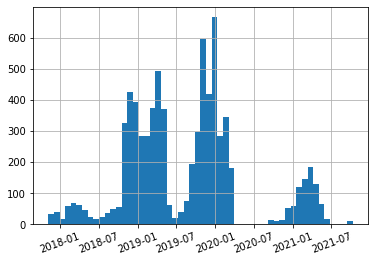

In [185]:
plt.xticks(rotation=20)
df[df['Страна тура']=='ОАЭ']['Дата начала тура'].hist(bins=54)

In [169]:
df['Дата начала тура'] = pd.to_datetime(df['Дата начала тура'], format='%Y-%m-%d %H:%M:%S')

In [153]:
df['Город отправления'].value_counts()

Москва                       180410
Санкт-Петербург               12938
Сочи                           2316
Анталья                        2082
Казань                         1846
Екатеринбург                   1040
Самара                          902
Краснодар                       887
Уфа                             746
Ростов-на-Дону                  569
Воронеж                         568
Ларнака                         393
Гагра                           384
Новосибирск                     376
Челябинск                       286
Мальдивы                        270
Минеральные Воды                265
Нижний Новгород                 163
Тюмень                          161
Нижневартовск                   158
Пермь                           134
Дубай                           129
Барселона                       104
Белгород                        100
Анапа                            96
Даламан                          96
Калининград                      89
Золотое Кольцо              

In [133]:
df[df['Город Отеля'].str.lower().str.contains('геле').fillna(False)]

,ИД клиента,Пол,День рождения,Возраст клиента,Заявка №,Дата бронирования,Дата начала тура,Год,Ночей,Вид тура,Тип заявки,Страна тура,Регион отеля,Туристов,"Туристы, взрослые","Туристы, дети",Младенцы,Звездность,Состав группы (Заявка) (Заявка),Сумма в $,Наименование тура,Глубина продаж,Тип питания,Город Отеля,Город отправления,Звездность_fix,Тип питания fix
10163,3526436,мужской,1973-03-19 00:00:00,48.0,4495288,2020-06-27 01:03:00,2020-07-12 00:00:00,2020,14,Наземное обслуживание,Пакет,Россия,Геленджик,3,2,1,0,4*,Семья,2855.36,Россия (только отель),14.956250,BB,Город Геленджик,Сочи,NaN,NaN
10197,3564285,мужской,2008-02-15 00:00:00,13.0,4512903,2020-07-13 19:07:00,2020-07-24 00:00:00,2020,8,Пляжный отдых,Индивидуальный тур,Россия,Геленджик,3,2,1,0,3*,Семья,983.83,Россия Геленджик MOW-GDZ GDS,10.203472,RO,Город Геленджик,Москва,NaN,NaN
10198,3564284,мужской,1974-08-12 00:00:00,46.0,4512903,2020-07-13 19:07:00,2020-07-24 00:00:00,2020,8,Пляжный отдых,Индивидуальный тур,Россия,Геленджик,3,2,1,0,3*,Семья,983.83,Россия Геленджик MOW-GDZ GDS,10.203472,RO,Город Геленджик,Москва,NaN,NaN
10226,3592336,мужской,1986-02-23 00:00:00,35.0,4523483,2020-07-22 01:00:00,2020-08-03 00:00:00,2020,7,Пляжный отдых,Индивидуальный тур,Россия,Геленджик,4,4,0,0,3*,Группа,1021.72,Россия Геленджик MOW-GDZ GDS,11.958333,RO,Город Геленджик,Москва,NaN,NaN
28084,3521342,мужской,1973-07-15 00:00:00,47.0,4491294,2020-06-22 18:45:00,2020-07-04 00:00:00,2020,12,Пляжный отдых,Пакет,Россия,Геленджик,6,5,1,0,4*,Семья,3386.57,Россия Геленджик MOW-GDZ GDS,11.218750,BB,Город Геленджик,Москва,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203051,3530481,женский,1972-02-16 00:00:00,49.0,4500133,2020-07-02 16:44:00,2020-07-15 00:00:00,2020,13,Пляжный отдых,Пакет,Россия,Геленджик,2,2,0,0,2*,Пары,1529.54,Россия Геленджик MOW-GDZ GDS,12.302778,All Inclusive,Город Геленджик,Москва,NaN,NaN
203606,3760456,женский,1968-08-08 00:00:00,52.0,4602455,2020-08-27 17:55:00,2020-10-05 00:00:00,2020,8,Пляжный отдых,Индивидуальный тур,Россия,Геленджик,2,2,0,0,3*,Пары,696.23,Россия Геленджик MOW-GDZ GDS,38.253472,FB,Город Геленджик,Москва,NaN,NaN
208078,3539443,женский,1996-04-04 00:00:00,24.0,4501429,2020-07-03 14:22:00,2020-07-11 00:00:00,2020,7,Пляжный отдых,Индивидуальный тур,Россия,Геленджик,1,1,0,0,3*,Одиночки,498.59,Россия Геленджик MOW-GDZ GDS,7.401389,RO,Город Геленджик,Москва,NaN,NaN
208085,3561504,женский,1998-09-12 00:00:00,22.0,4511640,2020-07-12 00:34:00,2020-07-30 00:00:00,2020,5,Пляжный отдых,Индивидуальный тур,Россия,Геленджик,2,2,0,0,3*,Пары,615.74,Россия Геленджик MOW-GDZ GDS,17.976389,BB,Город Геленджик,Москва,NaN,NaN


In [152]:
df[df['Город Отеля']=='Мугла']['Регион отеля'].unique()

array(['Фетхие', 'Мармарис'], dtype=object)

In [148]:
'Страна тура',
'Регион отеля',
'Город Отеля',

t = df.groupby('Город Отеля')['Регион отеля'].nunique()
t[t==2]

Город Отеля
Ичмелер         2
Мертвое море    2
Мугла           2
Name: Регион отеля, dtype: int64

In [140]:
pd.options.display.max_rows = None
df['Страна тура'].value_counts().head(100)

Турция                      124842
Кипр                         17868
Россия                        9538
Испания                       7582
ОАЭ                           7472
Греция                        6672
Италия                        5722
Черногория                    5333
Тунис                         3632
Болгария                      3601
Таиланд                       3595
Иордания                      2056
Хорватия                      1791
Абхазия                       1615
Израиль                       1342
Андорра                       1009
Мальдивы                       885
Чехия                          701
Куба                           565
Доминиканская Республика       518
Шри-Ланка                      316
Албания                        288
Круизы                         287
Индонезия                      274
Франция                        271
Венгрия                        136
Грузия                         135
Финляндия                       89
Австрия             

In [55]:
features_client = [
    'Пол',
    'Возраст клиента',
    'Состав группы (Заявка) (Заявка)',
    'Город отправления'
]
features_tour = [
    
]

In [160]:
target = [
    'Ночей',
    'Сумма в $',
    'Звездность_fix',
#     'Сумма в $',
#     'Наименование тура',
#     'Глубина продаж',
    'Тип питания fix',
    'Страна тура',
    'Регион отеля',
    'Город Отеля',
]
df[target].head()

,Ночей,Сумма в $,Звездность_fix,Тип питания fix,Страна тура,Регион отеля,Город Отеля
0,12,1718.64,NaN,NaN,Турция,NaN,NaN
1,12,1718.64,71.0,NaN,Турция,NaN,NaN
2,6,948.45,1574.0,NaN,Турция,Белек,Боазкент
3,11,2128.15,16267.0,NaN,Турция,Кемер,Текирова
4,11,2128.15,27657.0,NaN,Турция,Кемер,Текирова
